# Google Colab Object Classification Training and Inference for Flower Classification

## This notebook is run on Colab to avoid issues with GPU training on Window

--From Roboflow (left this note for future troubleshooting): Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Thu Nov 21 22:04:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Import OS and get the current working directory

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8 for Classification



In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/235.7 GB disk)


## Tune YOLO8 on custom dataset via transfer learning

Create the datasets folder and move to that directory, then use roboflow to download the image dataset with training and testing folders

In [4]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("screws-nvbc9").project("flower_classification_withai")
version = project.version(1)
dataset = version.download("folder")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Flower_Classification_withAI-1 in folder:: 100%|██████████| 1063/1063 [00:00<00:00, 4384.70it/s]


In [5]:
!mv {dataset.location}/valid {dataset.location}/val

## Custom Training

Train the model. Task=classify is for a classification model, and yolov8n-cls.pt uses transfer learning, we point towards the dataset location just created and labels .yaml, we also used 50 epochs and the real size of the image (1024x1024 after resize from Roboflow and DallE generated image size). These will be held constant across datasets with and without AI image sets

In [6]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8n-cls.pt data={dataset.location} epochs=50 imgsz=1024

/content
100% 5.31M/5.31M [00:00<00:00, 77.9MB/s]
New https://pypi.org/project/ultralytics/8.3.35 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/datasets/Flower_Classification_withAI-1, epochs=50, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnos

Training results are saved in {HOME}/runs/classify/train/ - - below lists the training output files for evaluation

In [7]:
!ls -la {HOME}/runs/classify/train/

total 4324
drwxr-xr-x 3 root root   4096 Nov 21 22:15 .
drwxr-xr-x 3 root root   4096 Nov 21 22:05 ..
-rw-r--r-- 1 root root   1570 Nov 21 22:05 args.yaml
-rw-r--r-- 1 root root 119313 Nov 21 22:15 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 100555 Nov 21 22:15 confusion_matrix.png
-rw-r--r-- 1 root root 137898 Nov 21 22:15 events.out.tfevents.1732226724.3deeb8366c4b.928.0
-rw-r--r-- 1 root root   9792 Nov 21 22:15 results.csv
-rw-r--r-- 1 root root 114098 Nov 21 22:15 results.png
-rw-r--r-- 1 root root 486695 Nov 21 22:05 train_batch0.jpg
-rw-r--r-- 1 root root 483768 Nov 21 22:05 train_batch1.jpg
-rw-r--r-- 1 root root 495951 Nov 21 22:05 train_batch2.jpg
-rw-r--r-- 1 root root 473898 Nov 21 22:13 train_batch320.jpg
-rw-r--r-- 1 root root 507303 Nov 21 22:13 train_batch321.jpg
-rw-r--r-- 1 root root 434332 Nov 21 22:13 train_batch322.jpg
-rw-r--r-- 1 root root 511369 Nov 21 22:15 val_batch0_labels.jpg
-rw-r--r-- 1 root root 511768 Nov 21 22:15 val_batch0_pred.jpg
drwxr-xr-

Let's look at the confusion matrix

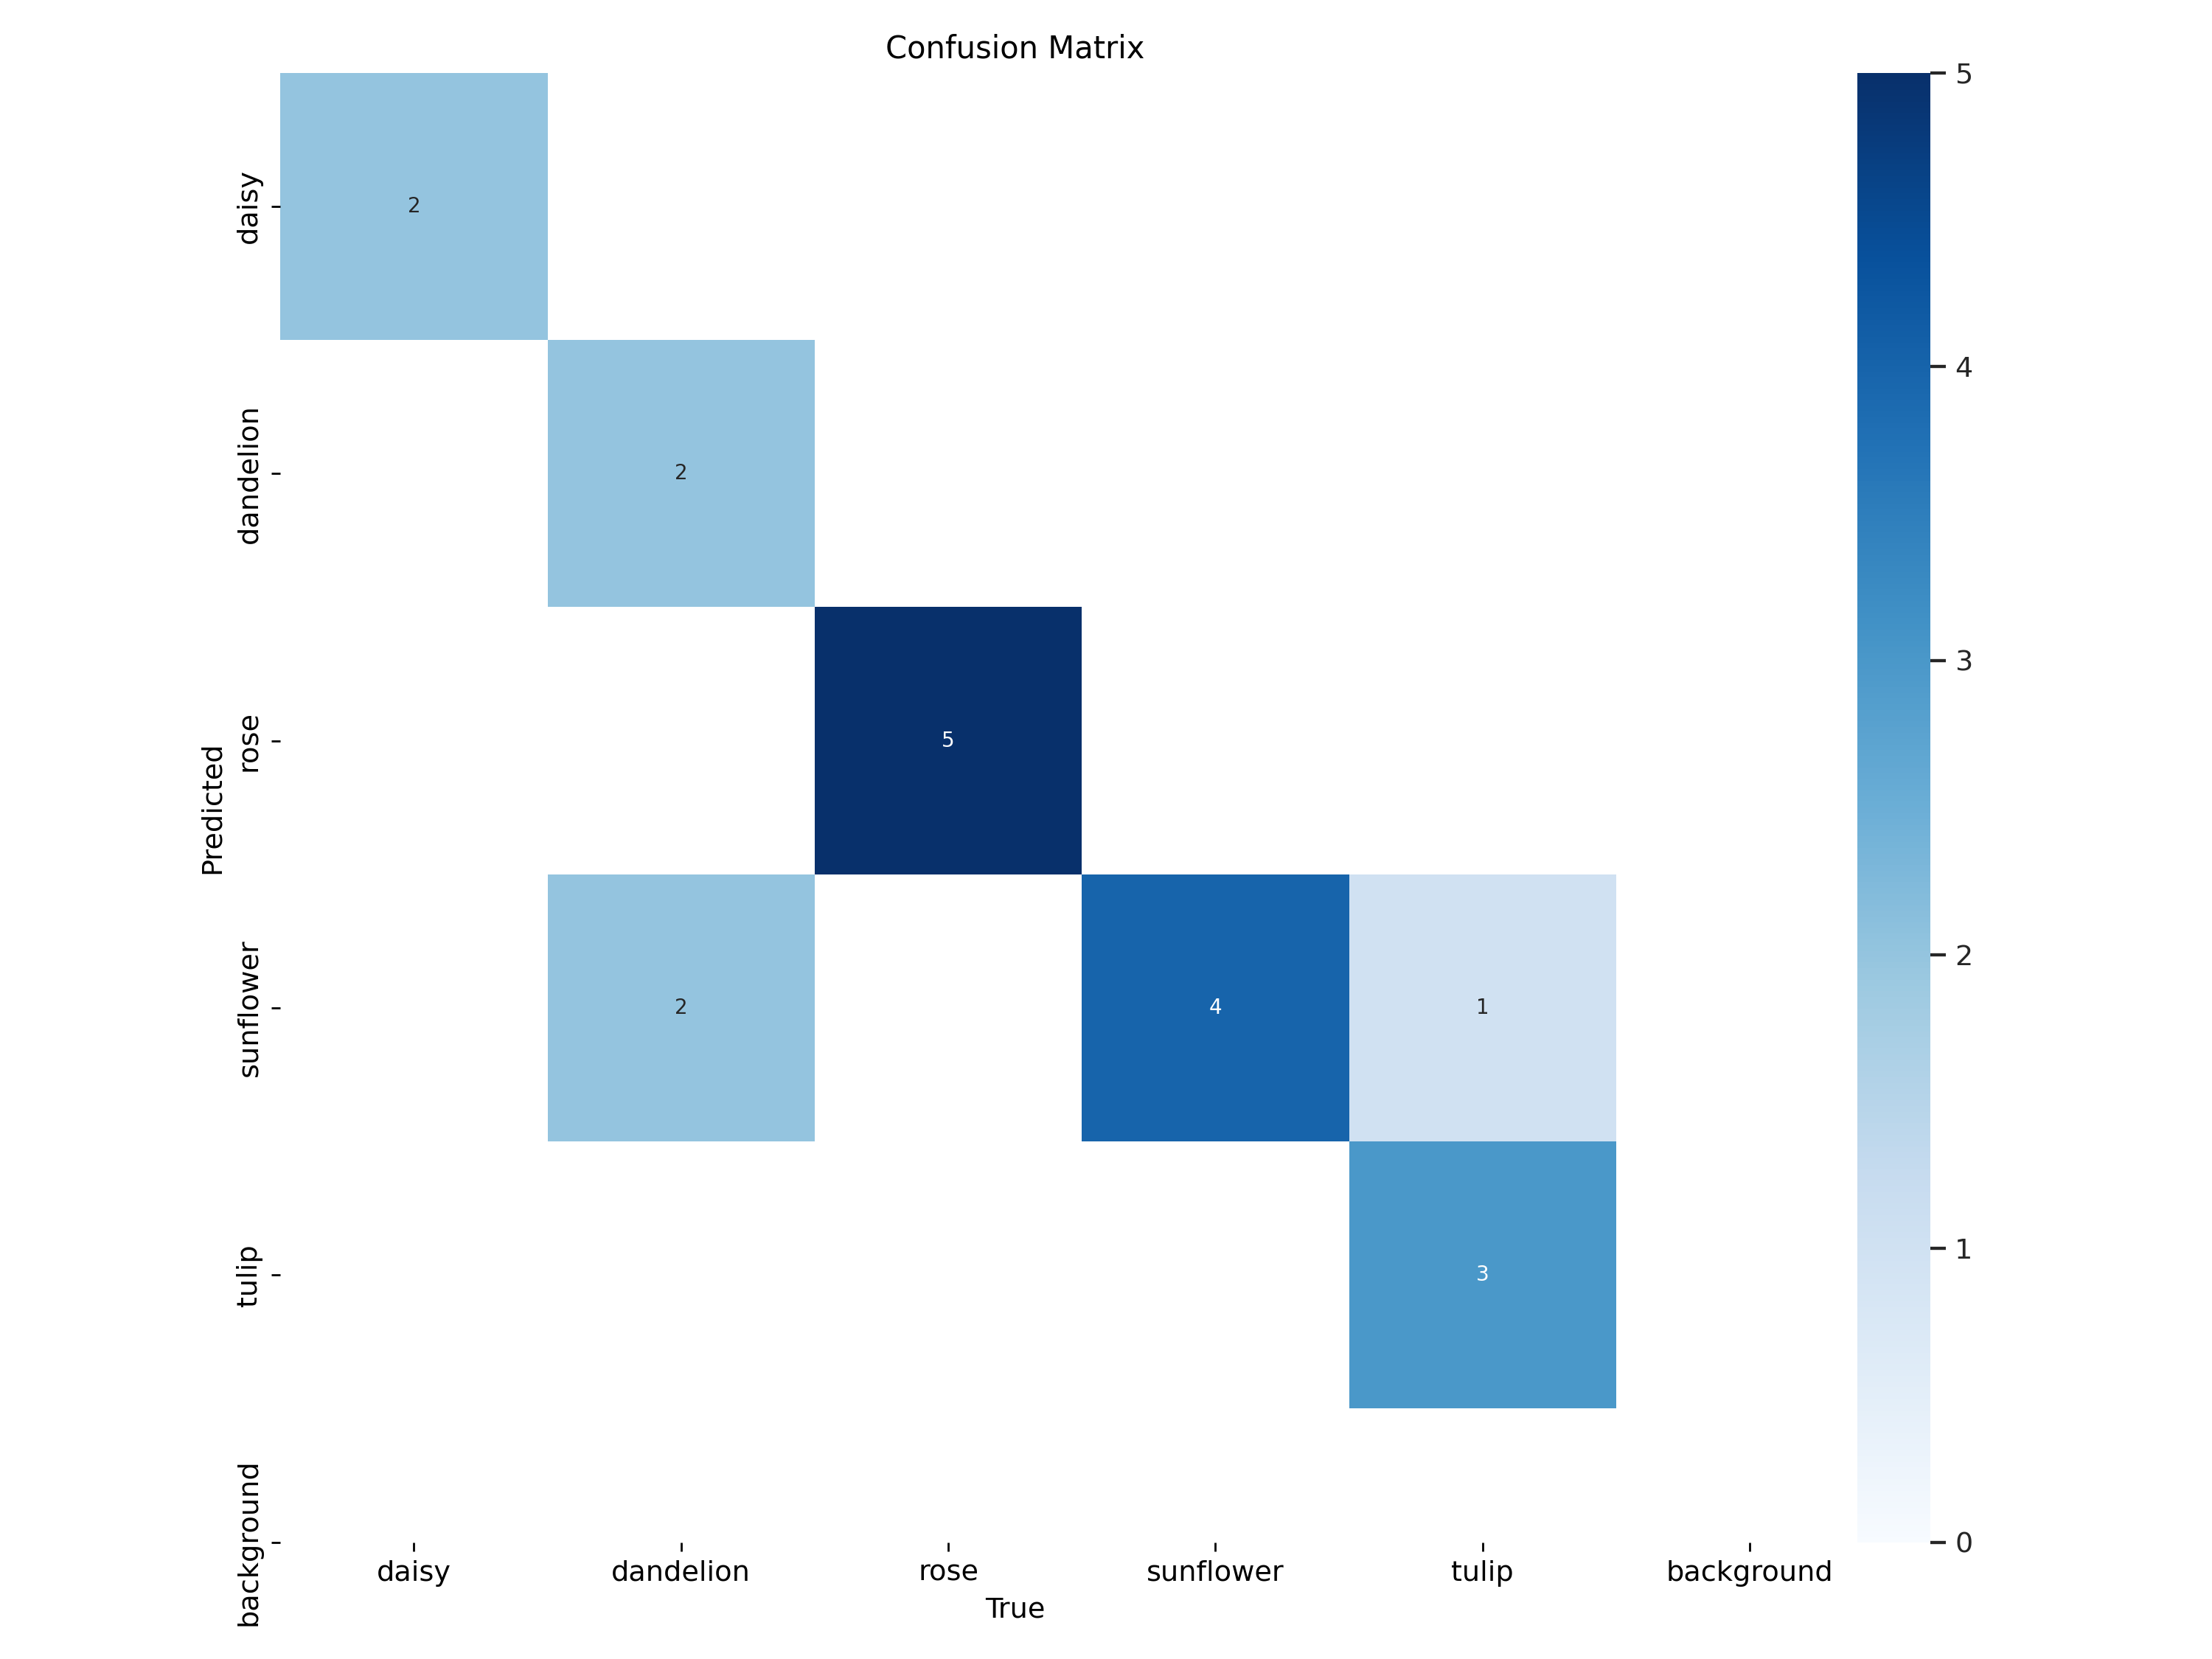

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/classify/train/confusion_matrix.png', width=1200)

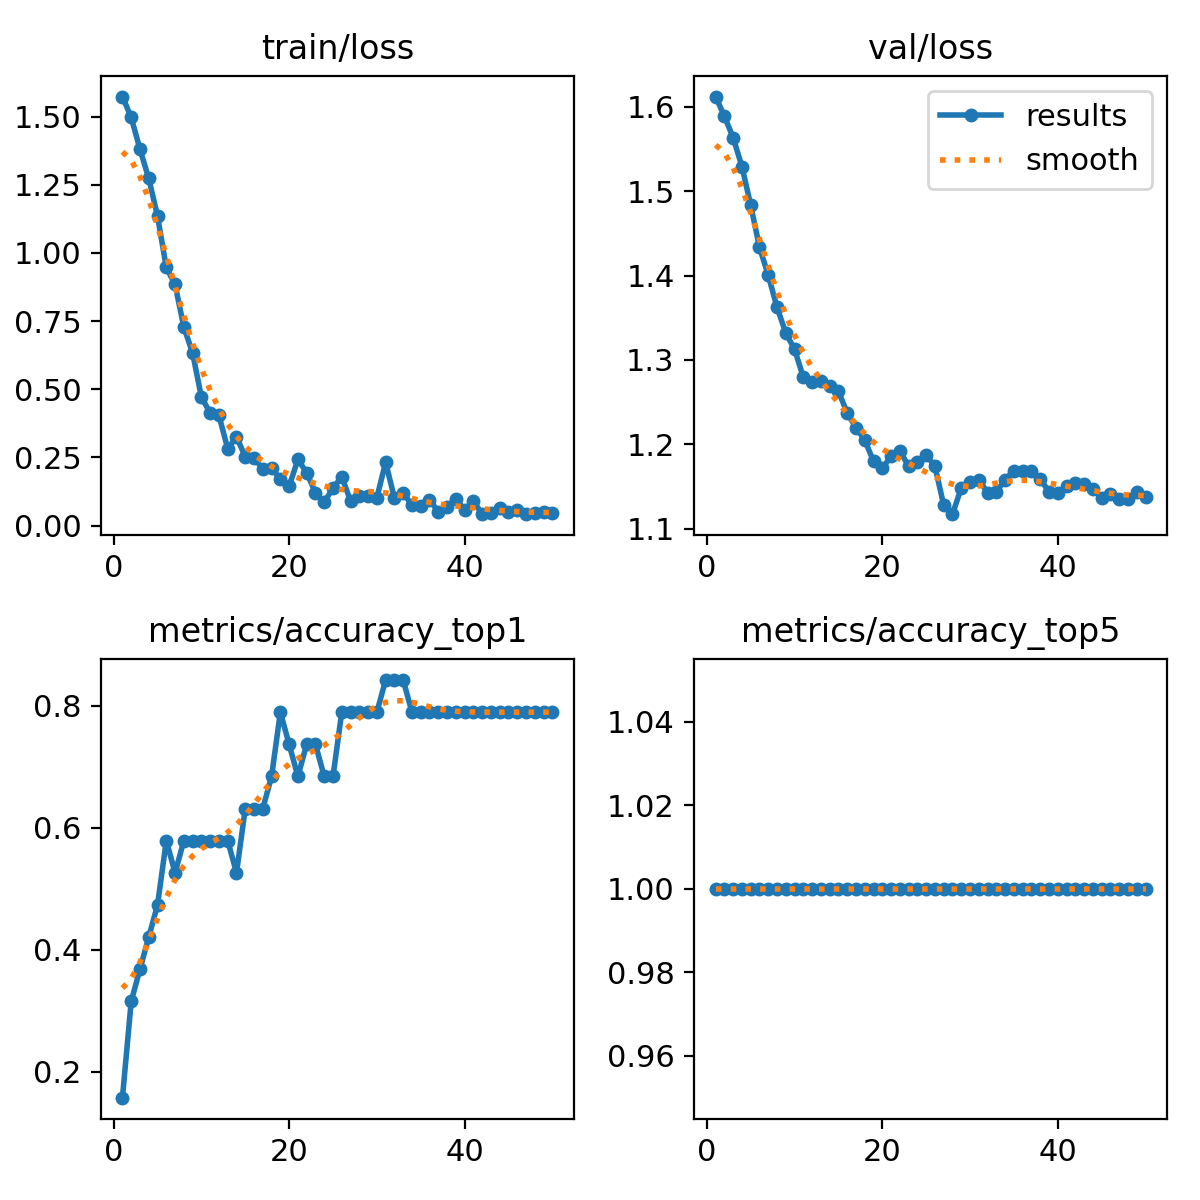

In [9]:
IPyImage(filename=f'{HOME}/runs/classify/train/results.png', width=1200)

Show the results of several epochs

In [10]:
!cat {HOME}/runs/classify/train/results.csv | head -10

                  epoch,             train/loss,  metrics/accuracy_top1,  metrics/accuracy_top5,               val/loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                 1.5735,                0.15789,                      1,                 1.6123,              4.998e-05,              4.998e-05,              4.998e-05
                      2,                 1.4968,                0.31579,                      1,                 1.5889,             0.00010498,             0.00010498,             0.00010498
                      3,                   1.38,                0.36842,                      1,                 1.5635,             0.00015772,             0.00015772,             0.00015772
                      4,                  1.273,                0.42105,                      1,                 1.5293,             0.00020819,             0.00020819,             0.00020819
                      5,                

View a training batch to see the model output

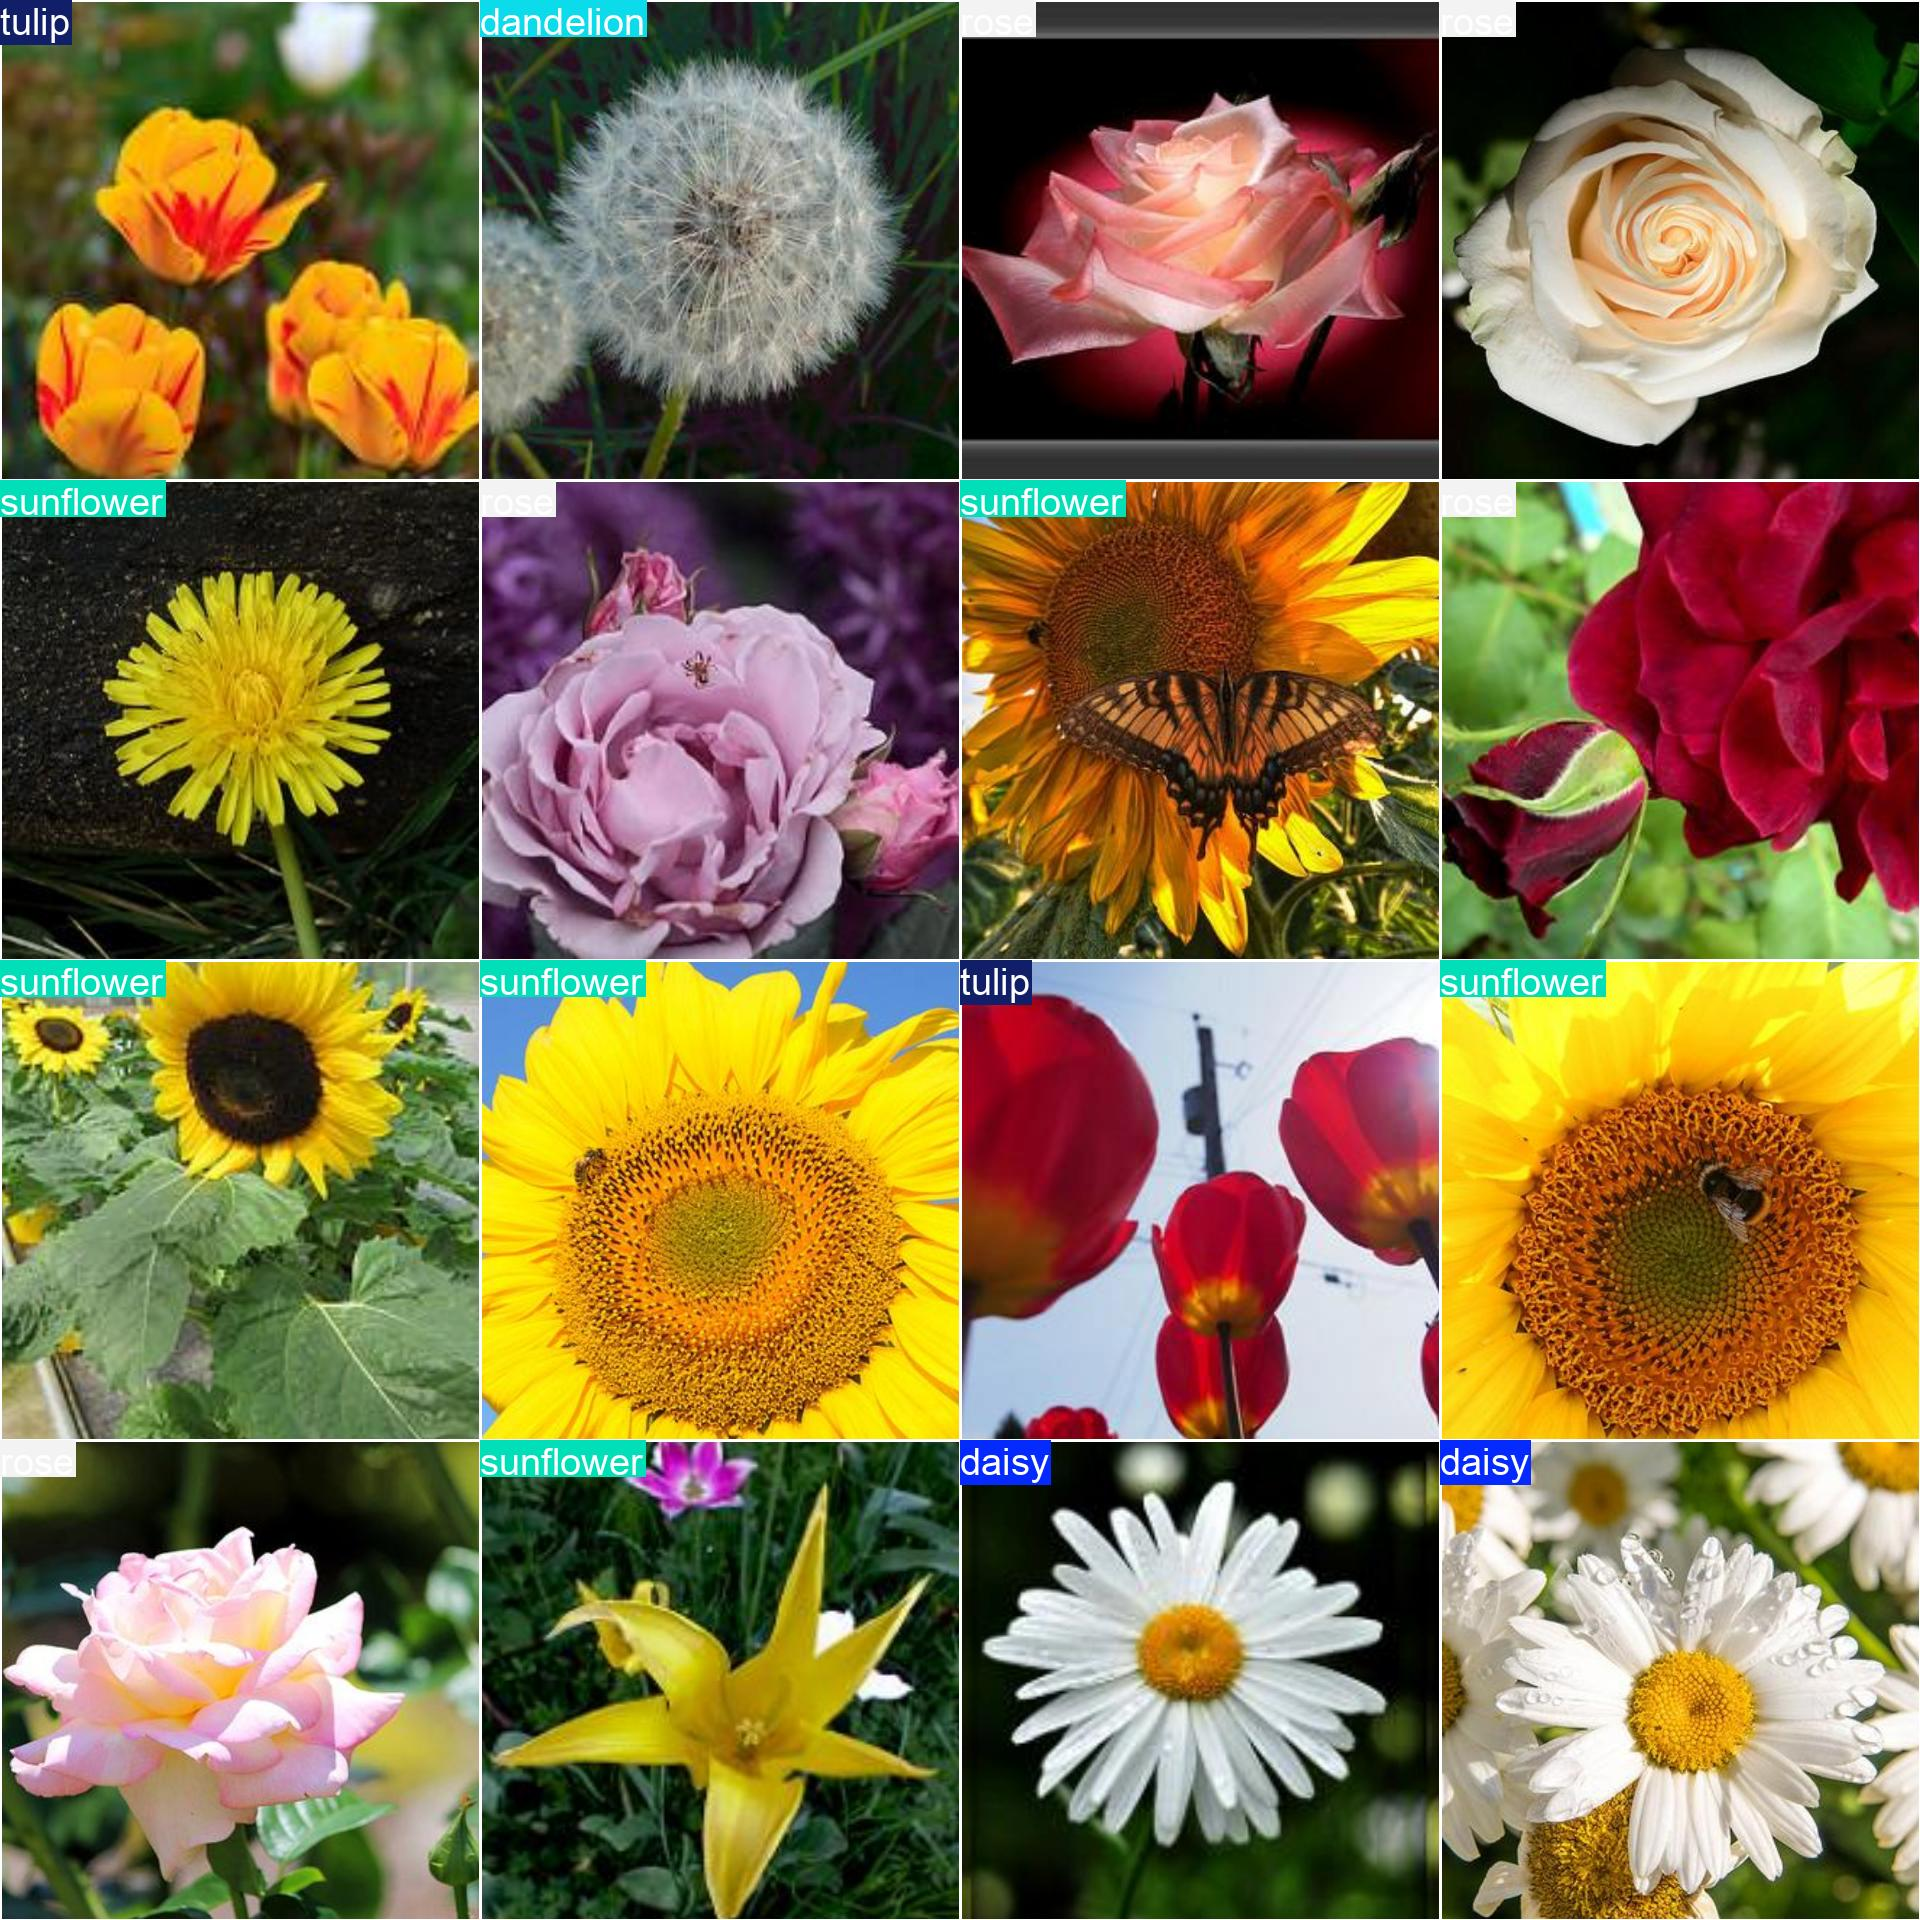

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/classify/train/val_batch0_pred.jpg', width=1600)

## Model Validation

YOLO evaluation

In [12]:
%cd {HOME}

!yolo task=classify mode=val model={HOME}/runs/classify/train/weights/best.pt data={dataset.location}

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,441,285 parameters, 0 gradients, 3.3 GFLOPs
train: /content/datasets/Flower_Classification_withAI-1/train... found 119 images in 5 classes ✅ 
val: /content/datasets/Flower_Classification_withAI-1/val... found 19 images in 5 classes ✅ 
test: /content/datasets/Flower_Classification_withAI-1/test... found 905 images in 5 classes ✅ 
val: Scanning /content/datasets/Flower_Classification_withAI-1/val... 19 images, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100% 2/2 [00:02<00:00,  1.42s/it]
                   all      0.842          1
Speed: 20.5ms preprocess, 28.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

Prediction on test data for daisy

In [13]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source={dataset.location}/test/daisy

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,441,285 parameters, 0 gradients, 3.3 GFLOPs

image 1/179 /content/datasets/Flower_Classification_withAI-1/test/daisy/100080576_f52e8ee070_n_jpg.rf.6b8045e9f053d8d3c4a6482104ade515.jpg: 1024x1024 daisy 0.94, tulip 0.03, rose 0.02, sunflower 0.01, dandelion 0.00, 9.0ms
image 2/179 /content/datasets/Flower_Classification_withAI-1/test/daisy/10140303196_b88d3d6cec_jpg.rf.658c95bf416da1ce79d5331972783c12.jpg: 1024x1024 daisy 0.85, sunflower 0.11, tulip 0.02, rose 0.01, dandelion 0.01, 6.7ms
image 3/179 /content/datasets/Flower_Classification_withAI-1/test/daisy/10437929963_bc13eebe0c_jpg.rf.ccf898b06021d73a5484ca46f441ee41.jpg: 1024x1024 daisy 1.00, rose 0.00, sunflower 0.00, tulip 0.00, dandelion 0.00, 6.6ms
image 4/179 /content/datasets/Flower_Classification_withAI-1/test/daisy/10770585085_4742b9dac3_n_jpg.rf.d2dfa6e1bd4f9f331c5ed4920f085733.jpg: 1024x

Automated way to compare the image file name (-sign or -nosign) and see if the detections match

Single image results

In [20]:
result = !yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source={dataset.location}/test/daisy/100080576_f52e8ee070_n_jpg.rf.6b8045e9f053d8d3c4a6482104ade515.jpg
result

['Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)',
 'YOLOv8n-cls summary (fused): 73 layers, 1,441,285 parameters, 0 gradients, 3.3 GFLOPs',
 '',
 'image 1/1 /content/datasets/Flower_Classification_withAI-1/test/daisy/100080576_f52e8ee070_n_jpg.rf.6b8045e9f053d8d3c4a6482104ade515.jpg: 1024x1024 daisy 0.94, tulip 0.03, rose 0.02, sunflower 0.01, dandelion 0.00, 8.7ms',
 'Speed: 89.9ms preprocess, 8.7ms inference, 0.1ms postprocess per image at shape (1, 3, 1024, 1024)',
 'Results saved to \x1bruns/classify/predict2\x1b',
 '💡 Learn more at https://docs.ultralytics.com/modes/predict']

# Inference on the model for stats

In [17]:
from ultralytics import YOLO
import glob
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the model
model = YOLO('/content/runs/classify/train/weights/best.pt')

# Create a dictionary to store image paths with their corresponding flower type
flower_images = {
    img_path: 'daisy' for img_path in glob.glob(os.path.join('/content/datasets/Flower_Classification_withAI-1/test/daisy/', '*.jpg'))
}
flower_images.update({
    img_path: 'dandelion' for img_path in glob.glob(os.path.join('/content/datasets/Flower_Classification_withAI-1/test/dandelion/', '*.jpg'))
})
flower_images.update({
    img_path: 'rose' for img_path in glob.glob(os.path.join('/content/datasets/Flower_Classification_withAI-1/test/rose/', '*.jpg'))
})
flower_images.update({
    img_path: 'sunflower' for img_path in glob.glob(os.path.join('/content/datasets/Flower_Classification_withAI-1/test/sunflower/', '*.jpg'))
})
flower_images.update({
    img_path: 'tulip' for img_path in glob.glob(os.path.join('/content/datasets/Flower_Classification_withAI-1/test/tulip/', '*.jpg'))
})

# Initialize the stats dictionary
stats = {}

def update_stats(flower_type, predicted_class):
    # Ensure flower type exists in stats
    if flower_type not in stats:
        stats[flower_type] = {"total": 0, "misclassifications": 0}

    # Update stats
    stats[flower_type]["total"] += 1
    if predicted_class != flower_type:
        stats[flower_type]["misclassifications"] += 1

# Process each image and print the results
for image_path, flower_type in flower_images.items():
    print(f"Results for {image_path} (Flower Type: {flower_type}):")
    results = model.predict(source=image_path, conf=0.25, save=False)  # Save=False prevents saving annotated images

    # Extract the predicted class from results
    predicted_class = results[0].names[results[0].probs.top1]
    # Get the confidence as well
    confidence = results[0].probs.top1conf.item()  # Confidence score of the top 1 class

    print(f"Detected flower: {predicted_class} with confidence: {confidence:.2f}")

    # Update stats
    update_stats(flower_type, predicted_class)

# Print the gathered stats
print("\nSummary Stats:")
for flower_type, data in stats.items():
    print(f"{flower_type}: Total={data['total']}, Misclassifications={data['misclassifications']}")


Results for /content/datasets/Flower_Classification_withAI-1/test/daisy/14350958832_29bdd3a254_jpg.rf.bf1aac4c0bc135aa146804a9572bb338.jpg (Flower Type: daisy):

image 1/1 /content/datasets/Flower_Classification_withAI-1/test/daisy/14350958832_29bdd3a254_jpg.rf.bf1aac4c0bc135aa146804a9572bb338.jpg: 1024x1024 daisy 0.99, rose 0.01, sunflower 0.00, dandelion 0.00, tulip 0.00, 6.7ms
Speed: 90.4ms preprocess, 6.7ms inference, 0.1ms postprocess per image at shape (1, 3, 1024, 1024)
Detected flower: daisy with confidence: 0.99
Results for /content/datasets/Flower_Classification_withAI-1/test/daisy/5110109540_beed4ed162_m_jpg.rf.14a7abb42aa7f54e540f12314799f149.jpg (Flower Type: daisy):

image 1/1 /content/datasets/Flower_Classification_withAI-1/test/daisy/5110109540_beed4ed162_m_jpg.rf.14a7abb42aa7f54e540f12314799f149.jpg: 1024x1024 daisy 0.95, tulip 0.03, rose 0.02, sunflower 0.00, dandelion 0.00, 6.7ms
Speed: 66.5ms preprocess, 6.7ms inference, 0.1ms postprocess per image at shape (1, 3, 1

## Deploy model on Roboflow

Optional area to upload data back to Roboflow

In [18]:
project.version(dataset.version).deploy(model_type="yolov8-cls", model_path=f"{HOME}/runs/classify/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/screws-nvbc9/flower_classification_withai/1
Share your model with the world at: https://universe.roboflow.com/screws-nvbc9/flower_classification_withai/model/1
